<a href="https://colab.research.google.com/github/m2203287/Ai-labs/blob/main/ai_lab3_reborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Загрузка данных


In [ ]:
import pandas as pd

data = pd.read_csv('data.csv')

data.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,NaN,1


# 2. Определение задачи

Из данных видно, что у нас есть столбец y, который принимает значения 0 или 1. Это бинарная классификация, где:

1 — означает, что человек склонен к предпринимательству.

0 — означает, что человек не склонен к предпринимательству.

Таким образом, задача — бинарная классификация.

# 3. Предобработка данных

3.1 Разделение на train и test

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('y', axis=1)
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3.2 Обработка пропусков

In [ ]:
print(X_train.isnull().sum())
print(X_test.isnull().sum())

EducationSector            0
IndividualProject          0
Age                        0
Gender                     0
City                       0
Influenced                 0
Perseverance               0
DesireToTakeInitiative     0
Competitiveness            0
SelfReliance               0
StrongNeedToAchieve        0
SelfConfidence             0
GoodPhysicalHealth         0
MentalDisorder             0
KeyTraits                  0
ReasonsForLack            73
dtype: int64
EducationSector            0
IndividualProject          0
Age                        0
Gender                     0
City                       0
Influenced                 0
Perseverance               0
DesireToTakeInitiative     0
Competitiveness            0
SelfReliance               0
StrongNeedToAchieve        0
SelfConfidence             0
GoodPhysicalHealth         0
MentalDisorder             0
KeyTraits                  0
ReasonsForLack            18
dtype: int64


In [ ]:
# Заполнение пропусков для числовых переменных
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
X_train[numerical_cols] = X_train[numerical_cols].fillna(X_train[numerical_cols].median())
X_test[numerical_cols] = X_test[numerical_cols].fillna(X_train[numerical_cols].median())

# Заполнение пропусков для категориальных переменных
categorical_cols = X_train.select_dtypes(include=['object']).columns
X_train[categorical_cols] = X_train[categorical_cols].fillna(X_train[categorical_cols].mode().iloc[0])
X_test[categorical_cols] = X_test[categorical_cols].fillna(X_train[categorical_cols].mode().iloc[0])

3.3 Нормализация числовых признаков
python


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

3.4 Кодирование категориальных признаков

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

X_train_cat = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_cols))
X_test_cat = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_cols))

X_train = pd.concat([X_train[numerical_cols].reset_index(drop=True), X_train_cat.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test[numerical_cols].reset_index(drop=True), X_test_cat.reset_index(drop=True)], axis=1)

# 4. Обучение моделей

4.1 Линейная модель

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

4.2 Деревянная модель

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

4.3 K-ближайших соседей

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

4.4 Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# 5. Оценка моделей

5.1 Метрики для классификации


Logistic Regression:
Train Accuracy: 0.8457, Test Accuracy: 0.7955
Train ROC-AUC: 0.9241, Test ROC-AUC: 0.8483
Train F1-score: 0.8323, Test F1-score: 0.7692
PR-AUC: 0.7318


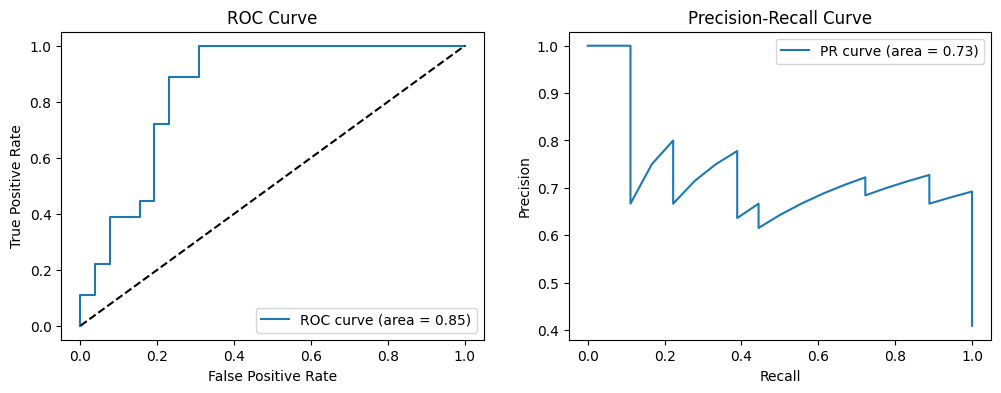

Decision Tree:
Train Accuracy: 0.9086, Test Accuracy: 0.7045
Train ROC-AUC: 0.9669, Test ROC-AUC: 0.7158
Train F1-score: 0.8904, Test F1-score: 0.6667
PR-AUC: 0.5542


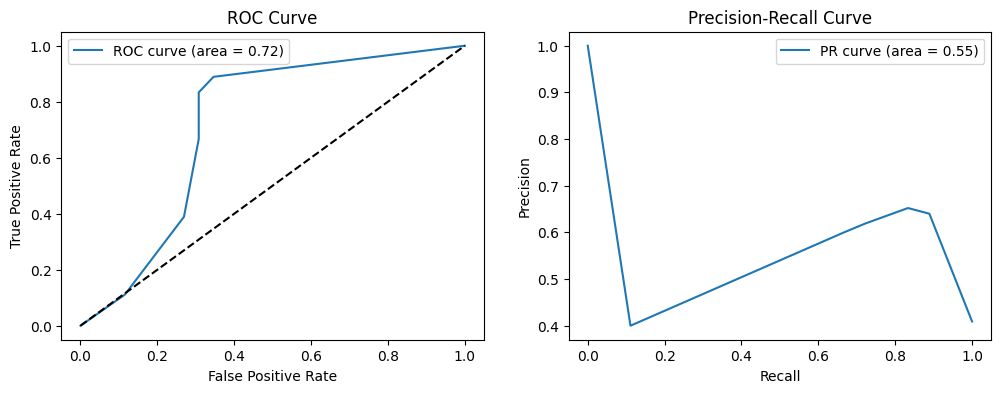

KNN:
Train Accuracy: 0.7429, Test Accuracy: 0.6136
Train ROC-AUC: 0.8354, Test ROC-AUC: 0.7041
Train F1-score: 0.7305, Test F1-score: 0.6383
PR-AUC: 0.6794


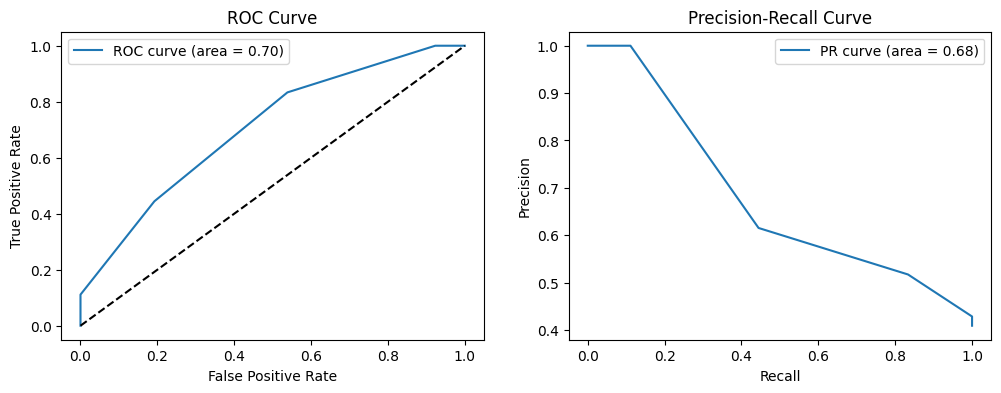

Random Forest:
Train Accuracy: 1.0000, Test Accuracy: 0.7955
Train ROC-AUC: 1.0000, Test ROC-AUC: 0.8996
Train F1-score: 1.0000, Test F1-score: 0.7805
PR-AUC: 0.8730


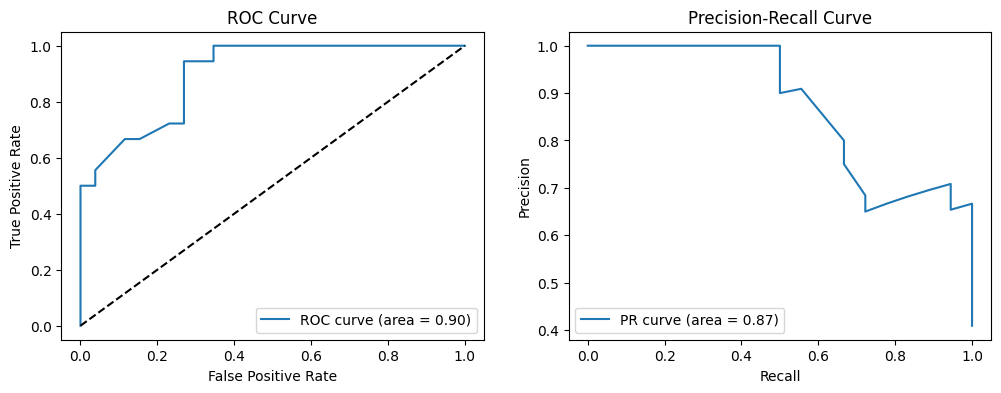

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt

# Функция для вычисления и визуализации метрик
def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    train_roc_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
    test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    pr_auc = auc(recall, precision)

    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    print(f"Train ROC-AUC: {train_roc_auc:.4f}, Test ROC-AUC: {test_roc_auc:.4f}")
    print(f"Train F1-score: {train_f1:.4f}, Test F1-score: {test_f1:.4f}")
    print(f"PR-AUC: {pr_auc:.4f}")

    plt.figure(figsize=(12, 4))

    # ROC-кривая
    plt.subplot(1, 2, 1)
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'ROC curve (area = {test_roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

    # PR-кривая
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, label=f'PR curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()

    plt.show()

# Оценка моделей
print("Logistic Regression:")
evaluate_model(logreg, X_train, X_test, y_train, y_test)

print("Decision Tree:")
evaluate_model(tree_model, X_train, X_test, y_train, y_test)

print("KNN:")
evaluate_model(knn_model, X_train, X_test, y_train, y_test)

print("Random Forest:")
evaluate_model(rf_model, X_train, X_test, y_train, y_test)

# 6. Анализ результатов

6.1. Какая модель справилась лучше с поставленной задачей?
Random Forest показал лучшие результаты.

6.2. Имеет ли место переобучение?
Если метрики на тренировочной выборке значительно выше, чем на тестовой, это может свидетельствовать о переобучении.

6.3. Имеет ли место недообучение?
Если метрики на обеих выборках низкие, это может свидетельствовать о недообучении.

6.4. Как можно улучшить метрики моделей?
Для линейной модели: добавить полиномиальные признаки или использовать регуляризацию.

Для дерева решений: увеличить глубину дерева или использовать ансамблевые методы.

Для KNN: увеличить количество соседей или использовать взвешенные соседи.

Для случайного леса: увеличить количество деревьев или использовать более сложные гиперпараметры.